## import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import pandas as pd

import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Input
from keras.callbacks import EarlyStopping


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import ADASYN
import keras_costum_metric.Balanced_accuracy as ba
import keras_costum_metric.F1metric_keras as f1
import keras_custom_callback.Early_Stop_AccLoss as Stop_AL
import keras_custom_callback.Checkpoint_best_auc as Checkpoint_A


import Set_model as model
import plot

## dataset 

In [22]:
# Load the dataset
credit_df=pd.read_csv("..\\data\\new_german_credit_2.csv")
pd.set_option('display.max_columns', None)
credit_df.head(10)

Unnamed: 0  Creditability  Account Balance  Duration of Credit (month)  \
0           0              1                1                           7   
1           1              1                1                           9   
2           2              1                2                           8   
3           3              1                1                           8   
4           4              1                1                           8   
5           5              1                1                           9   
6           6              1                1                           9   
7           7              1                1                           9   
8           8              1                3                           7   
9           9              1                2                           6   

   Payment Status of Previous Credit  Purpose  Credit Amount  \
0                                  3        2              8   
1                                  3        0              6   
2                                  2        3              9   
3                                  3        0              7   
4                                  3        0              7   
5                                  3        0              7   
6                                  3        0              6   
7                                  3        0              8   
8                                  3        3              8   
9                                  2        3              6   

   Value Savings/Stocks  Length of current employment  Instalment per cent  \
0                     1                             1                    4   
1                     1                             2                    2   
2                     2                             3                    2   
3                     1                             2                    3   
4                     1                             2                    4   
5                     1                             1                    1   
6                     1                             3                    1   
7                     1                             1                    2   
8                     1                             1                    4   
9                     3                             1                    1   

   Sex & Marital Status  Most valuable available asset  Age (years)  \
0                     1                              2            1   
1                     2                              1            2   
2                     1                              1            1   
3                     2                              1            2   
4                     2                              2            2   
5                     2                              1            3   
6                     2                              1            2   
7                     2                              1            3   
8                     1                              3            5   
9                     1                              4            1   

   Concurrent Credits  Type of apartment  No of Credits at this Bank  \
0                   2                  1                           1   
1                   2                  1                           1   
2                   2                  1                           1   
3                   2                  1                           1   
4                   1                  2                           1   
5                   2                  1                           1   
6                   2                  2                           1   
7                   2                  2                           1   
8                   2                  2                           1   
9                   2                  1                           1   

   Occupation  T

In [23]:
X = credit_df.drop(columns=['Creditability'])
Y = credit_df['Creditability']

In [24]:
np.shape(X)


(1000, 17)

In [25]:
np.shape(Y)

(1000,)

In [26]:
scaler = MinMaxScaler()
scaler.fit(X)
t_X = scaler.transform(X)

In [27]:
print(t_X)

[[0.         0.         0.66666667 ... 0.         0.5        0.        ]
 [0.001001   0.         0.88888889 ... 0.         0.5        0.        ]
 [0.002002   0.5        0.77777778 ... 0.         0.         0.        ]
 ...
 [0.997998   1.         0.66666667 ... 0.         1.         1.        ]
 [0.998999   0.5        0.77777778 ... 0.         1.         1.        ]
 [1.         0.         0.44444444 ... 0.         0.5        0.        ]]


In [28]:
Y = np.array(Y)

## optimizer

In [29]:
# adam = keras.optimizers.Adam(learning_rate=0.0001)

In [30]:
loss = keras.losses.BinaryCrossentropy()

## metrics

In [31]:
metrics=['accuracy', keras.metrics.Precision(), ba.BalancedAccuracy() , f1.F1Score(), keras.metrics.AUC(name='auc')]

## model

In [32]:
# model1 = model.model1(optimizer= adam, metric = metrics)

In [33]:
# model1.summary()

## kfold

In [34]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


# # Initialize metrics lists
# accuracies = []
# precisions = []
# # recalls = []
# f1_scores = []
# roc_aucs = []
# # true_negatives = []
# balance_accuracies = []


# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     adam = keras.optimizers.Adam(learning_rate=0.0001)
#     model1 = model.model1(optimizer= adam, metric = metrics)
    
#     history = model1.fit(X_train, y_train, epochs=100, validation_split=0.1)

#     # print(history.history.keys())

#     loss_and_metrics = model1.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies.append(loss_and_metrics[1])
#     precisions.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies.append(loss_and_metrics[3])
#     f1_scores.append(loss_and_metrics[4])
#     roc_aucs.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    

#     plot.plotAccuracy(history)
    
#     plot.plotLoss(history)

#     plot.plotConfusionMatrix(model= model1, X_test=X_test, y_test=y_test)


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies)
# average_precision = np.mean(precisions)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies)
# average_f1_score = np.mean(f1_scores)
# average_roc_auc = np.mean(roc_aucs)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV recall: ", np.std(balance_accuracies))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))


In [35]:
adasyn = ADASYN(random_state=200)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=96)

# Initialize metrics lists
accuracies_1 = []
precisions_1 = []
# recalls = []
f1_scores_1 = []
roc_aucs_1 = []
# true_negatives = []
balance_accuracies_1 = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=200)

    adam1_5 = keras.optimizers.Adam(learning_rate=0.0001)

    model1_5 = model.model1(optimizer=adam1_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=60,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_01.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    history = model1_5.fit(X_adasyn, y_adasyn, epochs=600, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_1 = load_model('model\\best_model_01.keras')

    loss_and_metrics = best_model_1.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_1.append(loss_and_metrics[1])
    precisions_1.append(loss_and_metrics[2])
    # recalls.append(loss_and_metrics[3])
    balance_accuracies_1.append(loss_and_metrics[3])
    f1_scores_1.append(loss_and_metrics[4])
    roc_aucs_1.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    plot.plotAccuracy(history)
    plot.plotAUC(history)

    plot.plotLoss(history)

    plot.plotConfusionMatrix(model= best_model_1, X_test=X_test, y_test=y_test)

# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_1)
average_precision = np.mean(precisions_1) 
# average_recall = np.mean(recalls)
average_B_accuracy = np.mean(balance_accuracies_1)
average_f1_score = np.mean(f1_scores_1)
average_roc_auc = np.mean(roc_aucs_1)
# average_true_negative = np.mean(true_negatives)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_1))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_1))
# print(f"Average Recall: {average_recall}")
# print("Standard Deviation of CV recall: ", np.std(recalls))
print(f"Average Balanced accuracy: {average_B_accuracy}")
print("Standard Deviation of CV Balanced accuracy5tlor49: ", np.std(balance_accuracies_1))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_1))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_1))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))

Epoch 1/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.5312 - auc: 0.5850 - balanced_accuracy: 0.5000 - f1_score: 0.6512 - loss: 0.9591 - precision_1: 0.5833
Epoch 1: val_loss improved from inf to 0.93801, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4898 - auc: 0.4828 - balanced_accuracy: 0.4993 - f1_score: 0.6066 - loss: 1.0103 - precision_1: 0.4936 - val_accuracy: 0.6889 - val_auc: 0.5037 - val_balanced_accuracy: 0.5007 - val_f1_score: 0.6183 - val_loss: 0.9380 - val_precision_1: 0.7134
Epoch 2/600
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4375 - auc: 0.6333 - balanced_accuracy: 0.5000 - f1_score: 0.6316 - loss: 0.9977 - precision_1: 0.3929
Epoch 2: val_loss improved from 0.93801 to 0.93608, saving model to model\best_model_01.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4863 - auc: 0.5112 - balanced_accuracy: 0.4915 - f1_score: 0.6234 - loss: 0.9963 - precision_1: 0.4759 - val_accuracy: 0.6722 - 

KeyboardInterrupt: 

## Model 2 layers

In [ ]:
# adam2 = keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
# model2 = model.model2(optimizer= adam2, metric= metrics)

In [ ]:
# model2.summary()

In [ ]:
# kf = KFold(n_splits=10, shuffle=True, random_state=42)


# # Initialize metrics lists
# accuracies = []
# precisions = []
# # recalls = []
# f1_scores = []
# roc_aucs = []
# # true_negatives = []
# balance_accuracies = []
# confusion_matrices = []

# # Perform KFold cross-validation
# for train_index, test_index in kf.split(t_X):
#     X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
#     y_train, y_test = Y[train_index], Y[test_index]
    
#     model2.fit(X_train, y_train, epochs=100)

#     loss_and_metrics = model2.evaluate(X_test, y_test)
#     print(loss_and_metrics)
#     print('Loss = ',loss_and_metrics[0])
#     accuracies.append(loss_and_metrics[1])
#     precisions.append(loss_and_metrics[2])
#     # recalls.append(loss_and_metrics[3])
#     balance_accuracies.append(loss_and_metrics[3])
#     f1_scores.append(loss_and_metrics[4])
#     roc_aucs.append(loss_and_metrics[5])
#     # true_negatives.append(loss_and_metrics[6])
    


#     predicted = model2.predict(X_test)
#     predicted = tf.squeeze(predicted)
#     predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
#     actual = np.array(y_test)
#     conf_mat = confusion_matrix(actual, predicted)
#     displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
#     displ.plot()


# # Calculate the average of the metrics
# average_accuracy = np.mean(accuracies)
# average_precision = np.mean(precisions)
# # average_recall = np.mean(recalls)
# average_B_accuracy = np.mean(balance_accuracies)
# average_f1_score = np.mean(f1_scores)
# average_roc_auc = np.mean(roc_aucs)
# # average_true_negative = np.mean(true_negatives)


# # Display the metrics
# print(f"Average Accuracy: {average_accuracy}")
# print("Standard Deviation of CV accuracy: ", np.std(accuracies))
# print(f"Average Precision: {average_precision}")
# print("Standard Deviation of CV precision: ", np.std(precisions))
# # print(f"Average Recall: {average_recall}")
# # print("Standard Deviation of CV recall: ", np.std(recalls))
# print(f"Average Balanced accuracy: {average_B_accuracy}")
# print("Standard Deviation of CV recall: ", np.std(balance_accuracies))
# print(f"Average F1-Score: {average_f1_score}")
# print("Standard Deviation of CV F1: ", np.std(f1_scores))
# print(f"Average ROC-AUC: {average_roc_auc}")
# print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs))
# # print(f"Average true negative: {average_true_negative}")
# # print("Standard Deviation of CV true_negative: ", np.std(true_negatives))

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4375 - auc: 0.8859 - balanced_accuracy: 0.5059 - f1_score: 0.8369 - loss: 1.5080 - precision: 0.8540
Epoch 1: val_loss improved from inf to 1.36405, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5119 - auc: 0.6679 - balanced_accuracy: 0.4968 - f1_score: 0.8369 - loss: 1.4582 - precision: 0.6246 - val_accuracy: 0.6778 - val_auc: 0.6100 - val_balanced_accuracy: 0.4996 - val_f1_score: 0.8369 - val_loss: 1.3641 - val_precision: 0.7063
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4375 - auc: 0.4318 - balanced_accuracy: 0.5000 - f1_score: 0.8368 - loss: 1.5255 - precision: 0.3000
Epoch 2: val_loss improved from 1.36405 to 1.35579, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4819 - auc: 0.4892 - balanced_accuracy: 0.5002 - f1_score: 0.8368 - loss: 1.4536 - precision: 0.4614 - val_accuracy: 0.6833 - val_auc: 0

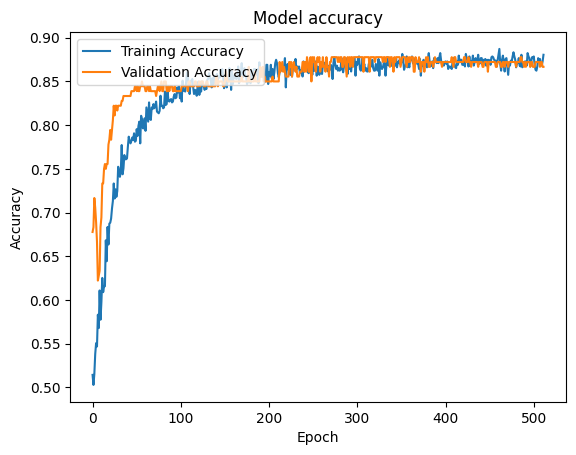

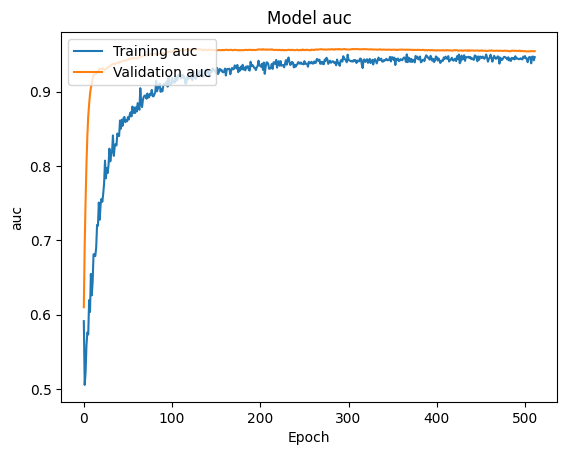

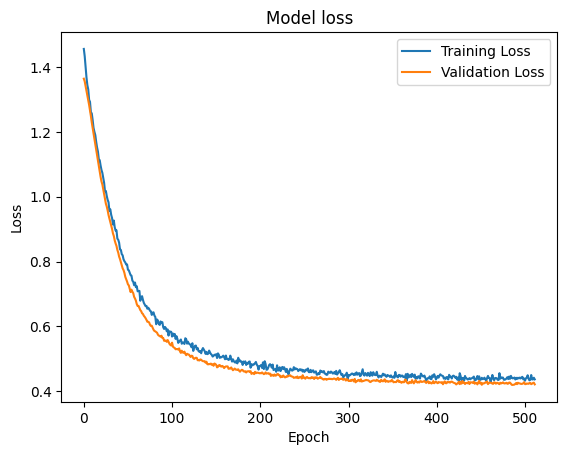

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


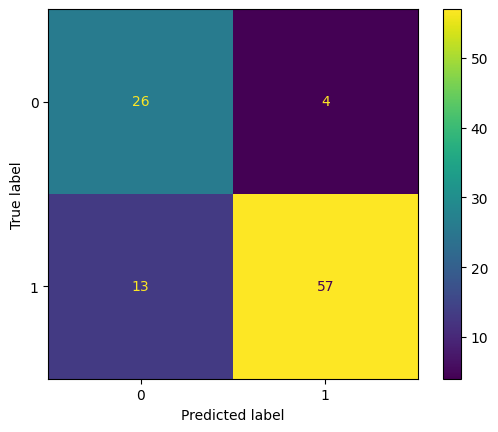

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5625 - auc: 0.9299 - balanced_accuracy: 0.5286 - f1_score: 0.8378 - loss: 1.3666 - precision: 0.9167
Epoch 1: val_loss improved from inf to 1.42124, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4997 - auc: 0.6907 - balanced_accuracy: 0.5259 - f1_score: 0.8378 - loss: 1.4130 - precision: 0.6653 - val_accuracy: 0.3444 - val_auc: 0.3811 - val_balanced_accuracy: 0.4999 - val_f1_score: 0.8377 - val_loss: 1.4212 - val_precision: 0.5806
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4688 - auc: 0.3937 - balanced_accuracy: 0.5000 - f1_score: 0.8377 - loss: 1.4468 - precision: 0.7143
Epoch 2: val_loss improved from 1.42124 to 1.39495, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4771 - auc: 0.4671 - balanced_accuracy: 0.5069 - f1_score: 0.8377 - loss: 1.4073 - precision: 0.4801 - val_accuracy: 0.3556 - val_auc: 0

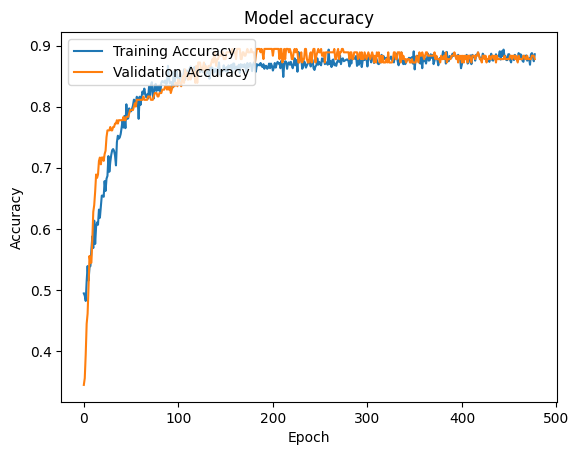

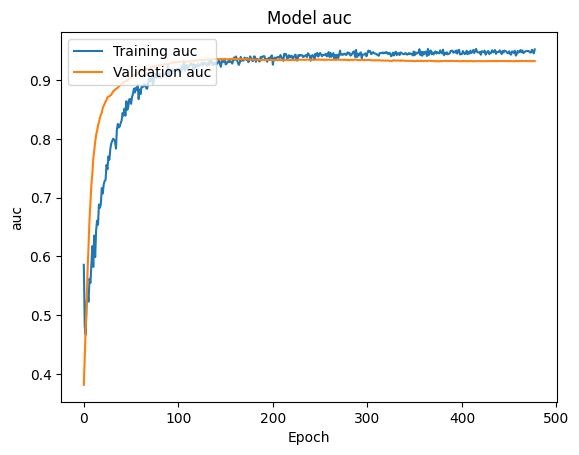

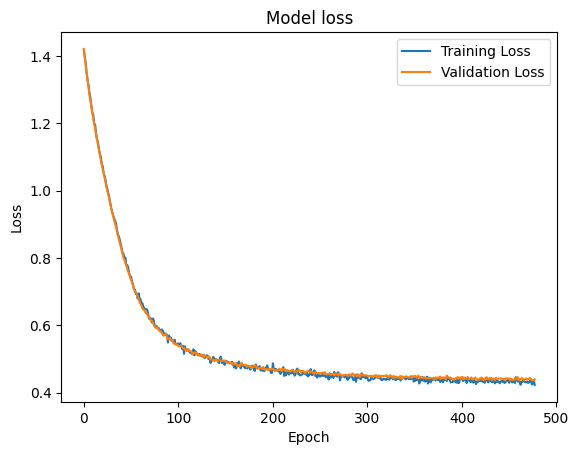

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


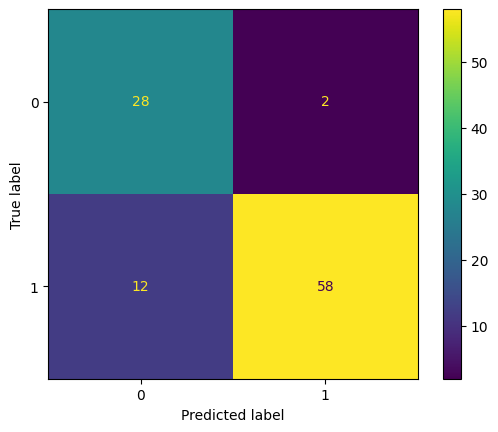

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.5625 - auc: 0.9050 - balanced_accuracy: 0.5027 - f1_score: 0.8385 - loss: 1.3842 - precision: 0.8841
Epoch 1: val_loss improved from inf to 1.34619, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4920 - auc: 0.6966 - balanced_accuracy: 0.4975 - f1_score: 0.8385 - loss: 1.4171 - precision: 0.6130 - val_accuracy: 0.6889 - val_auc: 0.5001 - val_balanced_accuracy: 0.5013 - val_f1_score: 0.8385 - val_loss: 1.3462 - val_precision: 0.7041
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3750 - auc: 0.4773 - balanced_accuracy: 0.5000 - f1_score: 0.8384 - loss: 1.4441 - precision: 0.2917
Epoch 2: val_loss improved from 1.34619 to 1.33305, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4733 - auc: 0.5127 - balanced_accuracy: 0.4953 - f1_score: 0.8384 - loss: 1.3999 - precision: 0.4566 - val_accuracy: 0.6778 - val_auc: 0

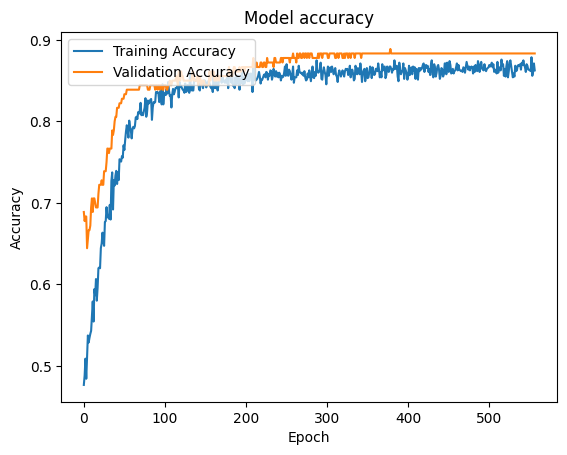

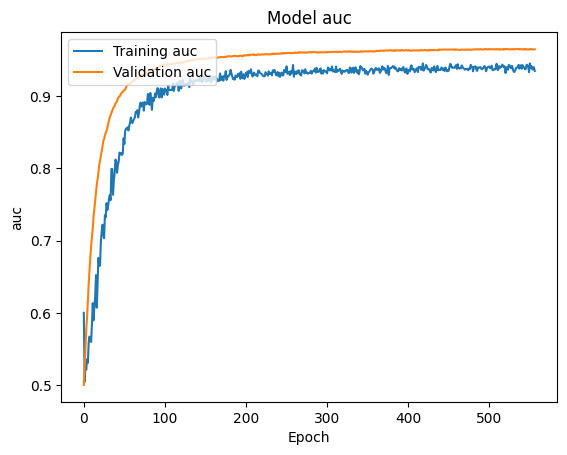

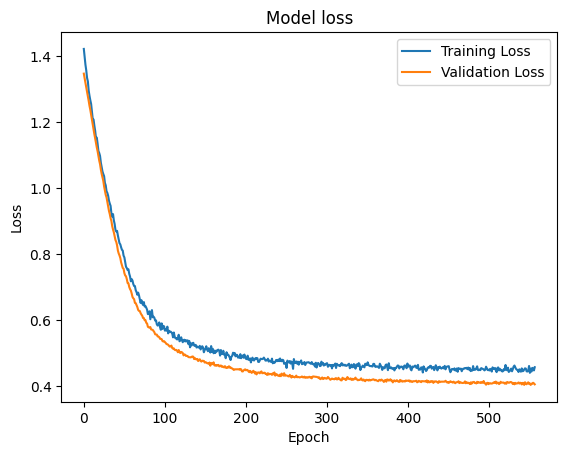

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


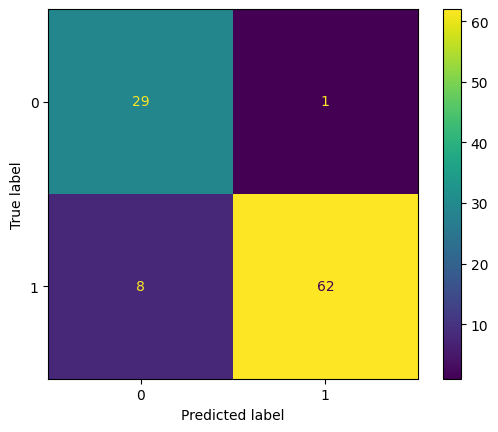

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.5625 - auc: 0.9346 - balanced_accuracy: 0.5012 - f1_score: 0.8383 - loss: 1.3901 - precision: 0.9023
Epoch 1: val_loss improved from inf to 1.36649, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5209 - auc: 0.6933 - balanced_accuracy: 0.4957 - f1_score: 0.8383 - loss: 1.4107 - precision: 0.6500 - val_accuracy: 0.6556 - val_auc: 0.5489 - val_balanced_accuracy: 0.4991 - val_f1_score: 0.8383 - val_loss: 1.3665 - val_precision: 0.6707
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4688 - auc: 0.4098 - balanced_accuracy: 0.5000 - f1_score: 0.8383 - loss: 1.4097 - precision: 0.5000
Epoch 2: val_loss improved from 1.36649 to 1.34923, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4636 - auc: 0.4723 - balanced_accuracy: 0.4990 - f1_score: 0.8383 - loss: 1.4028 - precision: 0.4781 - val_accuracy: 0.6500 - val_auc: 0

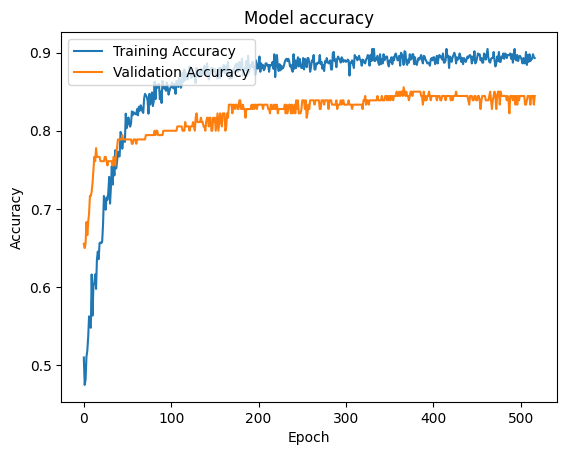

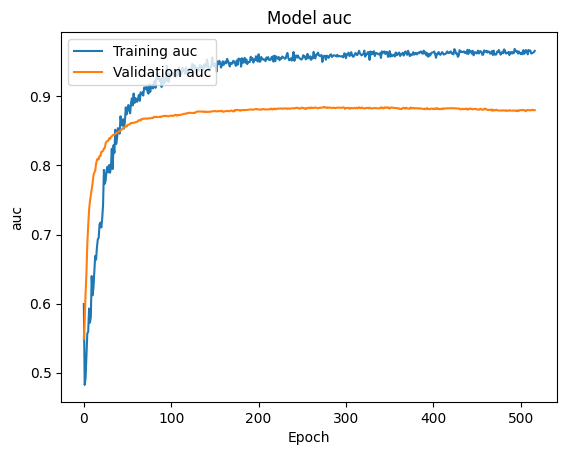

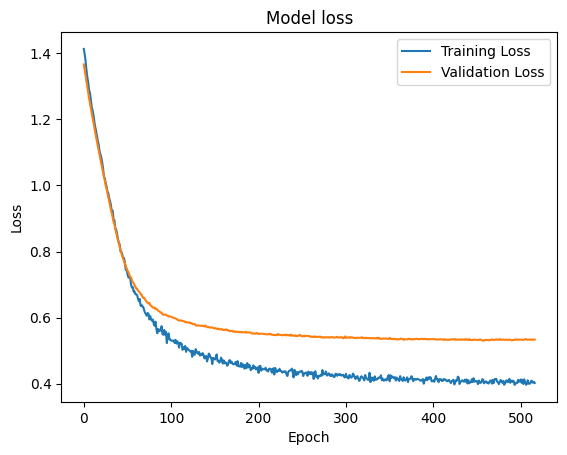

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


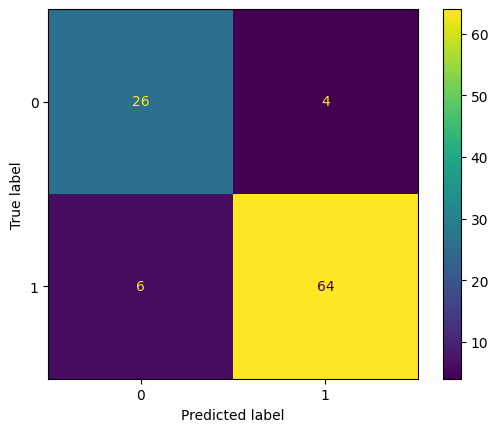

Epoch 1/700
28/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5228 - auc: 0.6937 - balanced_accuracy: 0.5398 - f1_score: 0.8400 - loss: 1.4037 - precision: 0.8026
Epoch 1: val_loss improved from inf to 1.45117, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5226 - auc: 0.6744 - balanced_accuracy: 0.5374 - f1_score: 0.8400 - loss: 1.4030 - precision: 0.7922 - val_accuracy: 0.3000 - val_auc: 0.3308 - val_balanced_accuracy: 0.5000 - val_f1_score: 0.8400 - val_loss: 1.4512 - val_precision: 0.0000e+00
Epoch 2/700
18/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4792 - auc: 0.4977 - balanced_accuracy: 0.4981 - f1_score: 0.8400 - loss: 1.3934 - precision: 0.5697   
Epoch 2: val_loss improved from 1.45117 to 1.41257, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4942 - auc: 0.5023 - balanced_accuracy: 0.4995 - f1_score: 0.8399 - loss: 1.3815 - precision: 0.5495 - val_accuracy: 0.3000 - val_

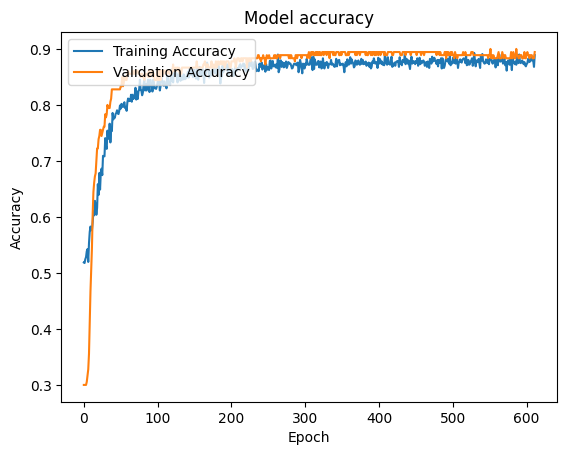

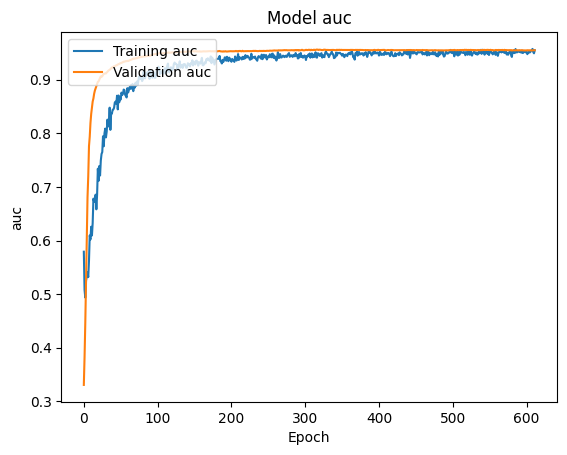

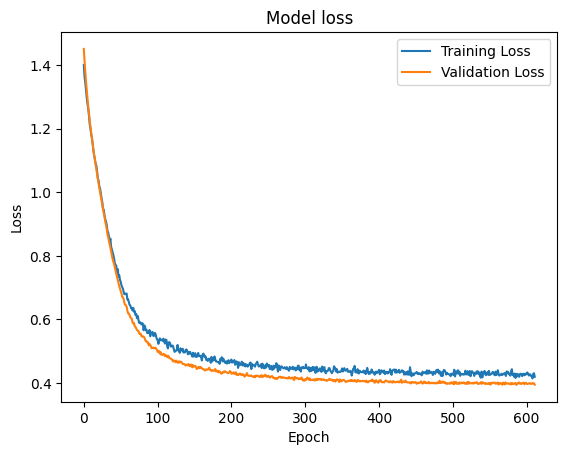

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


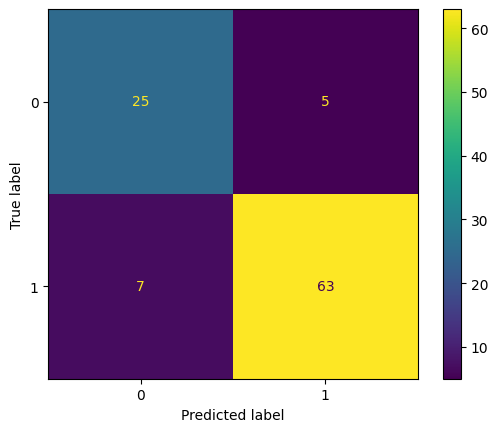

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.4375 - auc: 0.9277 - balanced_accuracy: 0.5346 - f1_score: 0.8409 - loss: 1.4436 - precision: 0.9262
Epoch 1: val_loss improved from inf to 1.42443, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5107 - auc: 0.7202 - balanced_accuracy: 0.5366 - f1_score: 0.8409 - loss: 1.4169 - precision: 0.7861 - val_accuracy: 0.3056 - val_auc: 0.6631 - val_balanced_accuracy: 0.4994 - val_f1_score: 0.8408 - val_loss: 1.4244 - val_precision: 0.6000
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4062 - auc: 0.4725 - balanced_accuracy: 0.5000 - f1_score: 0.8408 - loss: 1.3965 - precision: 0.2500
Epoch 2: val_loss improved from 1.42443 to 1.39728, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - auc: 0.5274 - balanced_accuracy: 0.5005 - f1_score: 0.8408 - loss: 1.3880 - precision: 0.4586 - val_accuracy: 0.3111 - val_auc: 0

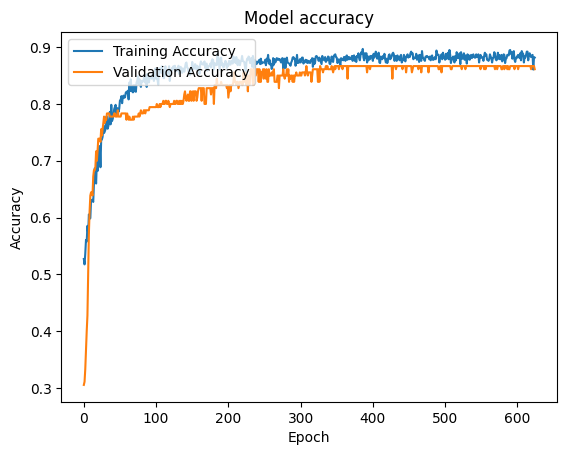

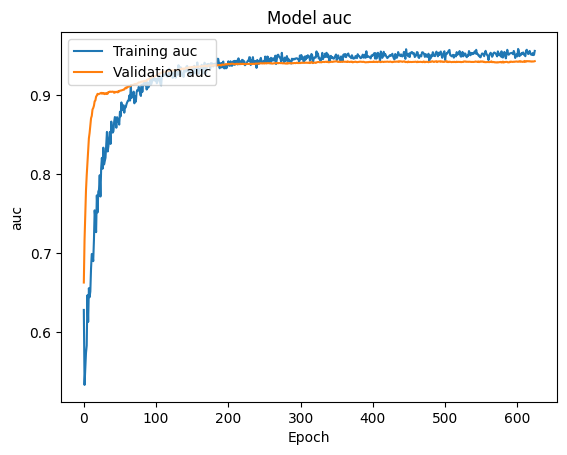

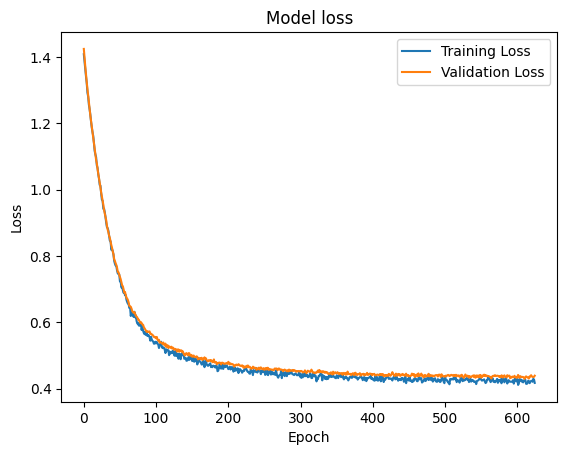

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


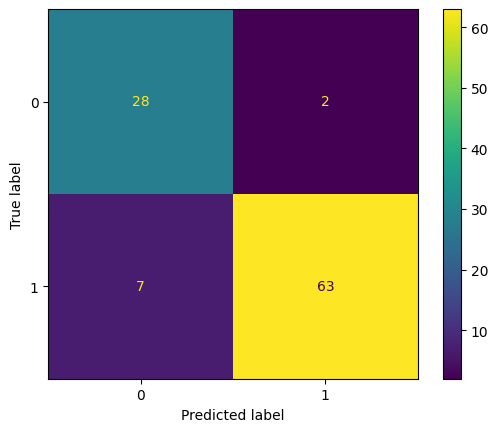

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4375 - auc: 0.9004 - balanced_accuracy: 0.5023 - f1_score: 0.8419 - loss: 1.4512 - precision: 0.8806
Epoch 1: val_loss improved from inf to 1.33785, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4863 - auc: 0.6945 - balanced_accuracy: 0.4945 - f1_score: 0.8419 - loss: 1.4252 - precision: 0.6137 - val_accuracy: 0.6722 - val_auc: 0.6543 - val_balanced_accuracy: 0.5011 - val_f1_score: 0.8418 - val_loss: 1.3378 - val_precision: 0.7041
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4375 - auc: 0.5000 - balanced_accuracy: 0.5000 - f1_score: 0.8418 - loss: 1.4367 - precision: 0.3750
Epoch 2: val_loss improved from 1.33785 to 1.32792, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5359 - auc: 0.5476 - balanced_accuracy: 0.4991 - f1_score: 0.8418 - loss: 1.3986 - precision: 0.5009 - val_accuracy: 0.6556 - val_auc: 0

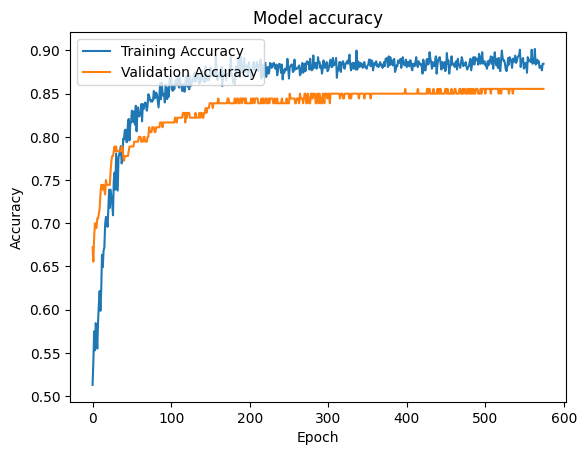

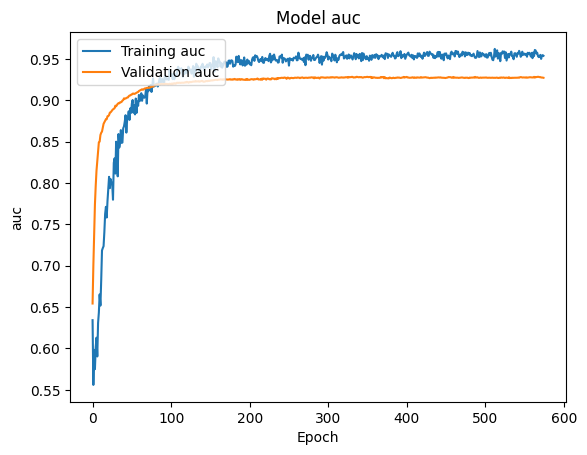

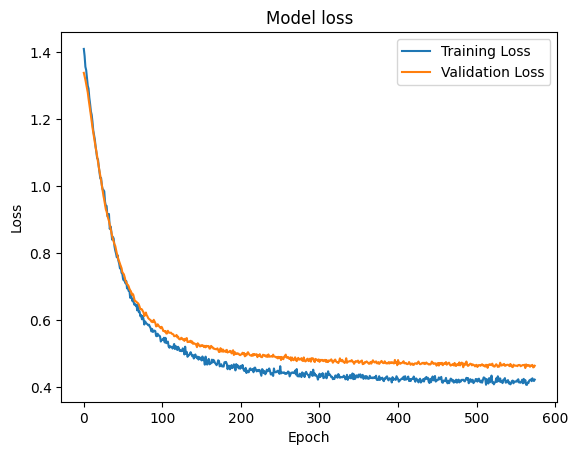

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


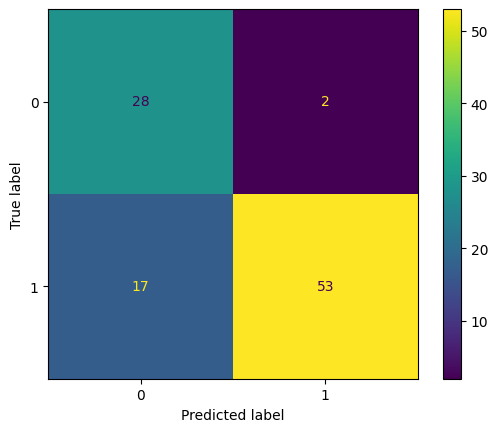

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 2:11 4s/step - accuracy: 0.5625 - auc: 0.8971 - balanced_accuracy: 0.5026 - f1_score: 0.8430 - loss: 1.4098 - precision: 0.9015
Epoch 1: val_loss improved from inf to 1.37279, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4963 - auc: 0.6760 - balanced_accuracy: 0.5077 - f1_score: 0.8429 - loss: 1.4051 - precision: 0.6626 - val_accuracy: 0.5389 - val_auc: 0.5484 - val_balanced_accuracy: 0.5059 - val_f1_score: 0.8429 - val_loss: 1.3728 - val_precision: 0.7100
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4062 - auc: 0.3615 - balanced_accuracy: 0.5000 - f1_score: 0.8429 - loss: 1.4035 - precision: 0.5625
Epoch 2: val_loss improved from 1.37279 to 1.35192, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4986 - auc: 0.4783 - balanced_accuracy: 0.4994 - f1_score: 0.8429 - loss: 1.3886 - precision: 0.5058 - val_accuracy: 0.5500 - val_auc: 

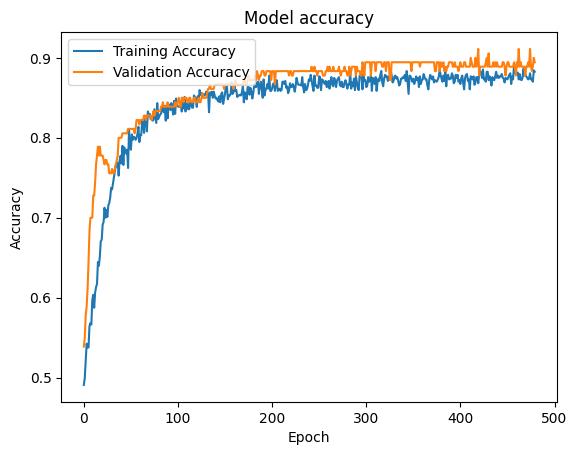

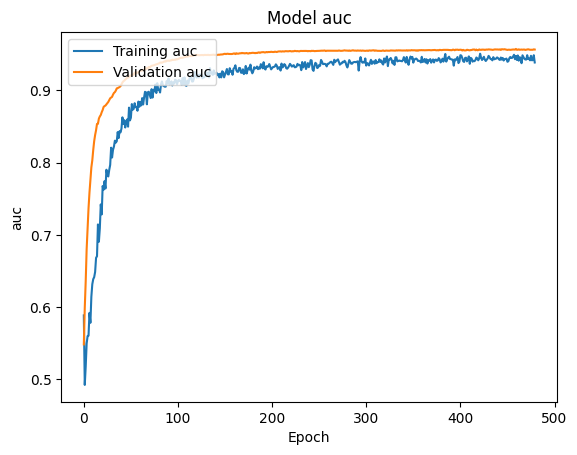

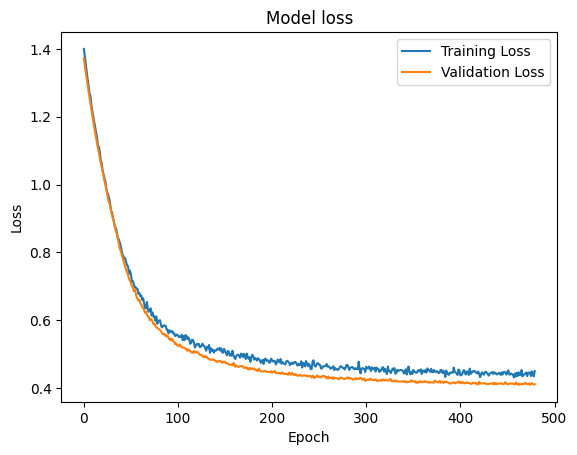

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


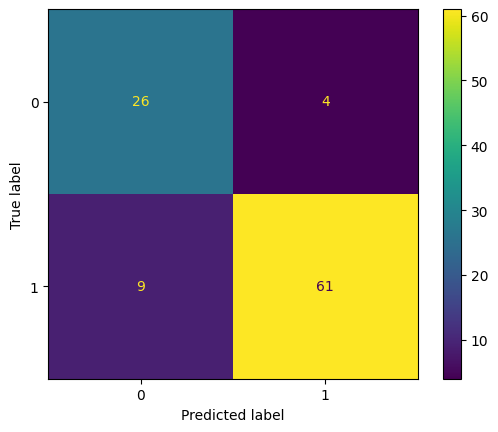

Epoch 1/700
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5349 - auc: 0.7262 - balanced_accuracy: 0.5030 - f1_score: 0.8431 - loss: 1.3864 - precision: 0.6689
Epoch 1: val_loss improved from inf to 1.36709, saving model to model\best_model_02.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5343 - auc: 0.7231 - balanced_accuracy: 0.5030 - f1_score: 0.8431 - loss: 1.3866 - precision: 0.6663 - val_accuracy: 0.5611 - val_auc: 0.5487 - val_balanced_accuracy: 0.5007 - val_f1_score: 0.8431 - val_loss: 1.3671 - val_precision: 0.6972
Epoch 2/700
 1/32 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6875 - auc: 0.6488 - balanced_accuracy: 0.5000 - f1_score: 0.8431 - loss: 1.3545 - precision: 0.6000
Epoch 2: val_loss improved from 1.36709 to 1.34877, saving model to model\best_model_02.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5338 - auc: 0.5302 - balanced_accuracy: 0.5017 - f1_score: 0.8431 - loss: 1.3739 - precision: 0.5460 - val_accuracy: 0.5611 - val_auc: 0

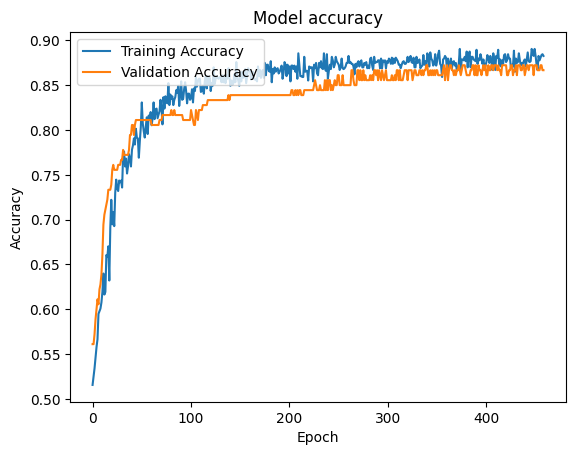

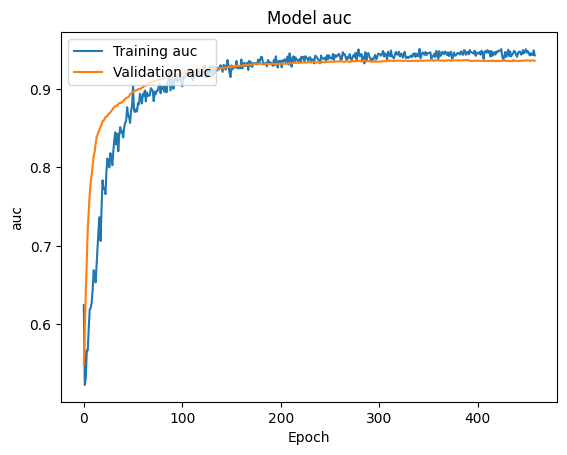

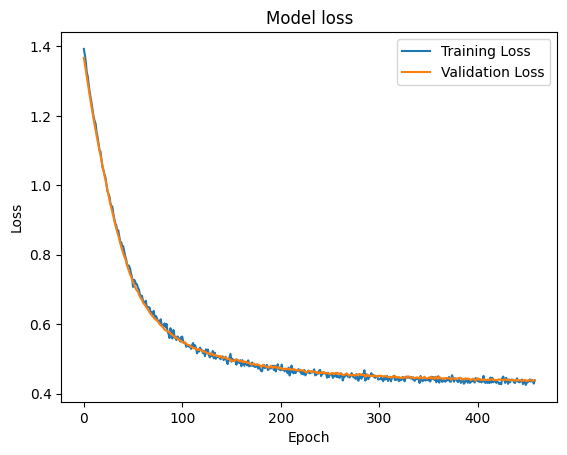

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


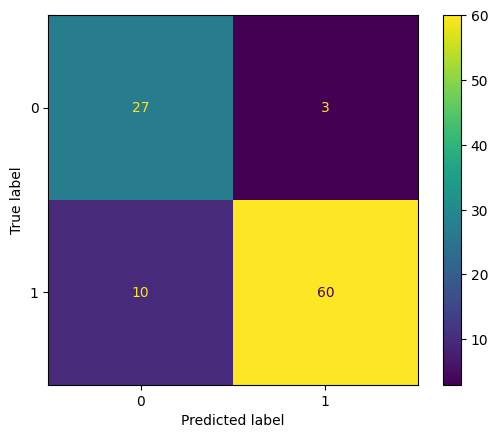

Epoch 1/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4688 - auc: 0.9031 - balanced_accuracy: 0.5206 - f1_score: 0.8434 - loss: 1.4413 - precision: 0.8730
Epoch 1: val_loss improved from inf to 1.40312, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4694 - auc: 0.6634 - balanced_accuracy: 0.5106 - f1_score: 0.8434 - loss: 1.4286 - precision: 0.6222 - val_accuracy: 0.4278 - val_auc: 0.4980 - val_balanced_accuracy: 0.5033 - val_f1_score: 0.8434 - val_loss: 1.4031 - val_precision: 0.7209
Epoch 2/700
 1/33 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5000 - auc: 0.4314 - balanced_accuracy: 0.5000 - f1_score: 0.8433 - loss: 1.4433 - precision: 0.4615
Epoch 2: val_loss improved from 1.40312 to 1.38086, saving model to model\best_model_02.keras
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5087 - auc: 0.4705 - balanced_accuracy: 0.5002 - f1_score: 0.8433 - loss: 1.4143 - precision: 0.4763 - val_accuracy: 0.4500 - val_auc: 0

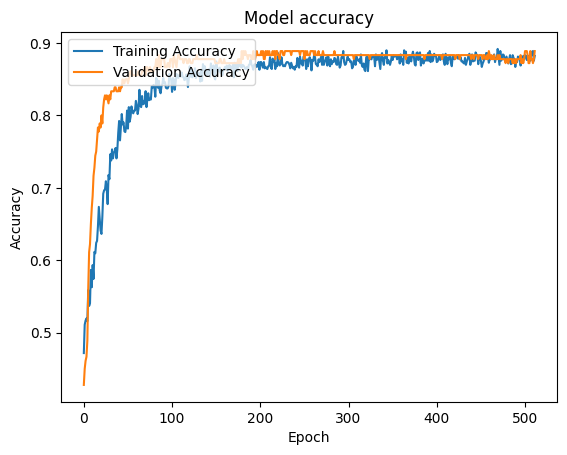

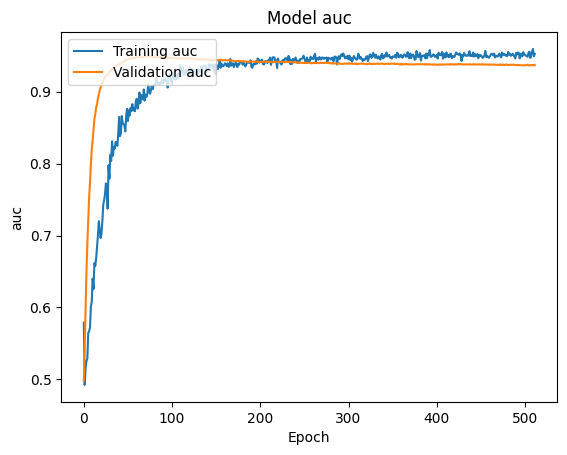

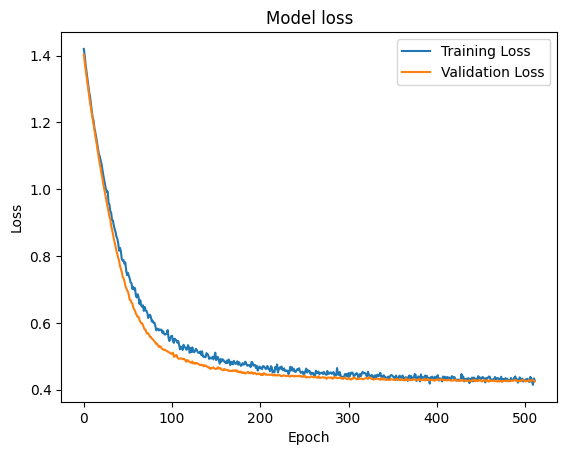

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


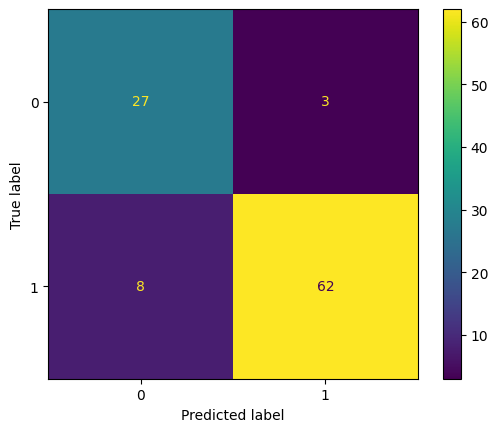

Average Accuracy: 0.8730000019073486
Standard Deviation of CV accuracy:  0.03132092391131638
Average Precision: 0.9530422687530518
Standard Deviation of CV precision:  0.017126804162200995
Average Balanced accuracy: 0.788356214761734
Standard Deviation of CV Balanced accuracy:  0.03999224819651823
Average F1-Score: 0.9366075277328492
Standard Deviation of CV F1:  0.017915112626156353
Average ROC-AUC: 0.9476666450500488
Standard Deviation of CV roc_auc:  0.018451330423090745


In [ ]:
adasyn = ADASYN(random_state=200)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=96)

# Initialize metrics lists
accuracies_2 = []
precisions_2 = []
# recalls = []
f1_scores_2 = []
roc_aucs_2 = []
# true_negatives = []
balance_accuracies_2 = []

# Perform KFold cross-validation
for train_index, test_index in kf.split(t_X, Y):
    X_train, X_test = t_X[train_index], t_X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

    X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=200)

    adam2_5 = keras.optimizers.Adam(learning_rate=0.0001)

    model2_5 = model.model2(optimizer=adam2_5, metric=metrics, loss=loss)

    X_adasyn, y_adasyn = adasyn.fit_resample(X_train_split, y_train_split)

    # early_stopping = Stop_AL.EarlyStopAccLoss(
    # min_delta=0.001,
    # min_delta_loss = 0.01,
    # patience_auc=100,
    # verbose=1,
    # )

    # checkpoint = Checkpoint_A.CheckpointBestAUC(min_delta_loss = 0.01)

    early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=60,
    verbose=1,
    mode="min",
    )

    checkpoint = keras.callbacks.ModelCheckpoint(
    filepath = 'model\\best_model_02.keras',
    monitor= "val_loss",
    verbose=1,
    mode="min",
    save_best_only=True,  # Save only the best model based on the monitored metric
    save_weights_only=False,  # Save the full model (set to True to save only the weights)
    save_freq='epoch'  # Save the model at the end of every epoch
    )
    

    
    history = model2_5.fit(X_adasyn, y_adasyn, epochs=700, validation_data=(X_val, y_val), callbacks = [early_stopping, checkpoint])

    best_model_2 = load_model('model\\best_model_02.keras')

    loss_and_metrics = best_model_2.evaluate(X_test, y_test)
    print(loss_and_metrics)
    print('Loss = ',loss_and_metrics[0])
    accuracies_2.append(loss_and_metrics[1])
    precisions_2.append(loss_and_metrics[2])
    # recalls.append(loss_and_metrics[3])
    balance_accuracies_2.append(loss_and_metrics[3])
    f1_scores_2.append(loss_and_metrics[4])
    roc_aucs_2.append(loss_and_metrics[5])
    # true_negatives.append(loss_and_metrics[6])
    

    plot.plotAccuracy(history)
    plot.plotAUC(history)
    plot.plotLoss(history)

    plot.plotConfusionMatrix(model= best_model_2, X_test=X_test, y_test=y_test)


# Calculate the average of the metrics
average_accuracy = np.mean(accuracies_2)
average_precision = np.mean(precisions_2)
# average_recall = np.mean(recalls)
average_B_accuracy = np.mean(balance_accuracies_2)
average_f1_score = np.mean(f1_scores_2)
average_roc_auc = np.mean(roc_aucs_2)
# average_true_negative = np.mean(true_negatives)


# Display the metrics
print(f"Average Accuracy: {average_accuracy}")
print("Standard Deviation of CV accuracy: ", np.std(accuracies_2))
print(f"Average Precision: {average_precision}")
print("Standard Deviation of CV precision: ", np.std(precisions_2))
# print(f"Average Recall: {average_recall}")
# print("Standard Deviation of CV recall: ", np.std(recalls))
print(f"Average Balanced accuracy: {average_B_accuracy}")
print("Standard Deviation of CV Balanced accuracy: ", np.std(balance_accuracies_2))
print(f"Average F1-Score: {average_f1_score}")
print("Standard Deviation of CV F1: ", np.std(f1_scores_2))
print(f"Average ROC-AUC: {average_roc_auc}")
print("Standard Deviation of CV roc_auc: ", np.std(roc_aucs_2))
# print(f"Average true negative: {average_true_negative}")
# print("Standard Deviation of CV true_negative: ", np.std(true_negatives))